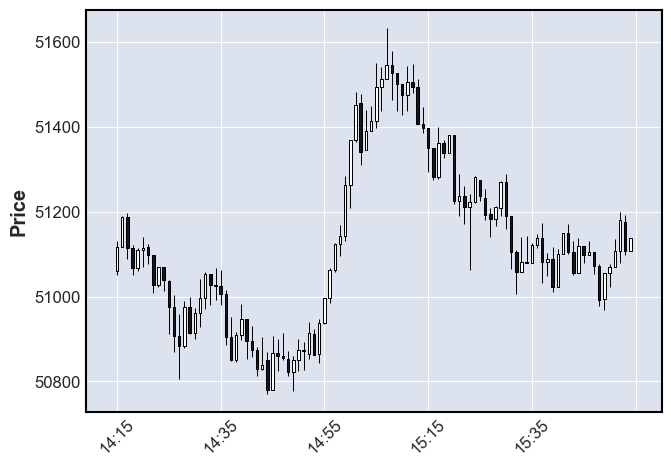

In [2]:
import marketData
import Plot

df = marketData.getData('BTCUSDT','1m', 100)

Plot.plotCandles(df)